In [42]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

### Load the data

In [43]:
df = pd.read_csv('..\data\survey_data_2023.csv')
df.head()

,music,os,gender,height,weight,shoe,month,color,pet,number,prob,math
0,rock,MacOS,F,1.71,68.0,39.0,oct,purple,dog,88.0,3.0,5.0
1,rock,Windows,F,1.68,52.0,39.0,aug,brown,cat,73.0,7.0,5.0
2,rock,MacOS,M,1.80,84.0,43.0,may,black,dog,7.0,8.0,10.0
3,metal,Windows,M,1.74,85.0,44.0,nov,black,dog,100.0,3.5,6.0
4,hiphop,Windows,M,1.77,63.0,42.0,jan,black,dog,42.0,9.5,10.0


#### a. Βρείτε ένα 95% διάστημα εμπιστοσύνης για τη διαφορά του μέσου ύψους μεταξύ ανδρών και γυναικών φοιτητών πληροφορικής του ΟΠΑ

#### Χωρίζουμε τα δεδομένα μας σε δύο ομάδες, σε άνδρες και σε γυναίκες και κρατάμε μόνο την στήλη που περιέχει το ύψος του καθενός.

In [44]:
# Height of all men
men_height = df.groupby('gender').get_group('M')['height']
count_of_men = men_height.count() # 81
men_height.head()

2    1.80
3    1.74
4    1.77
5    1.80
9    1.75
Name: height, dtype: float64

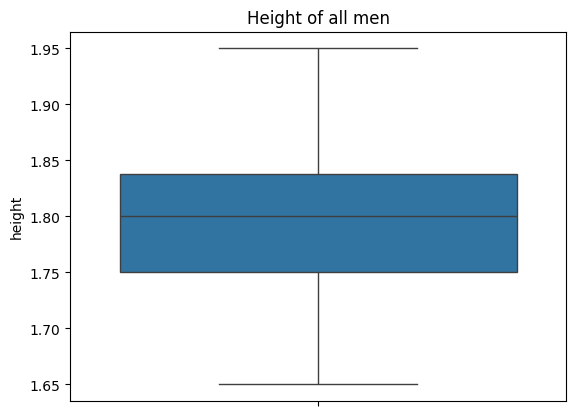

In [45]:
sns.boxplot(men_height)
plt.title('Height of all men')
plt.show()

- Δεν παρατηρούμε ατυπικά σημεία.

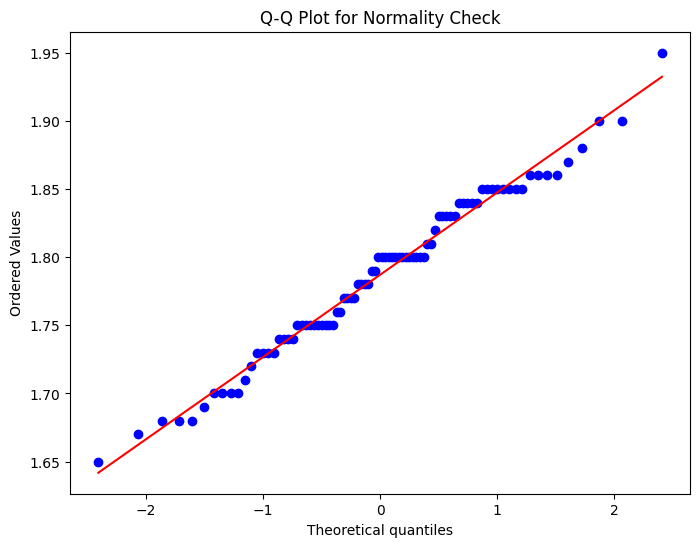

In [46]:
# Creating a Q-Q plot
plt.figure(figsize=(8, 6))
stats.probplot(men_height, dist="norm", plot=plt)
plt.title('Q-Q Plot for Normality Check')
plt.show()

- Όχι ιδιαίτερα κοντά στην κανονική κατανομή, αλλά αρκετά μεγάλο δείγμα (n = 81 >> 15 ) για να έχει ενας στατιστικός έλεγχος t ικανοποιητική ακρίβεια 

In [47]:
# Height of all women
women_height = df.groupby('gender').get_group('F')['height']
count_of_women = women_height.count() #26 
women_height.head()

0    1.71
1    1.68
6    1.60
7    1.63
8    1.75
Name: height, dtype: float64

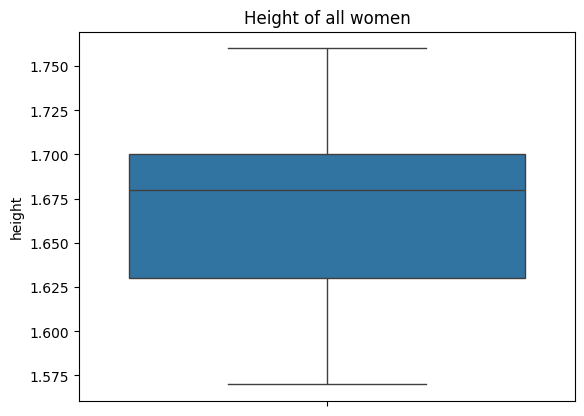

In [48]:
sns.boxplot(women_height)
plt.title("Height of all women")
plt.show()

- Δεν παρατηρούμε ατυπικά σημεία.

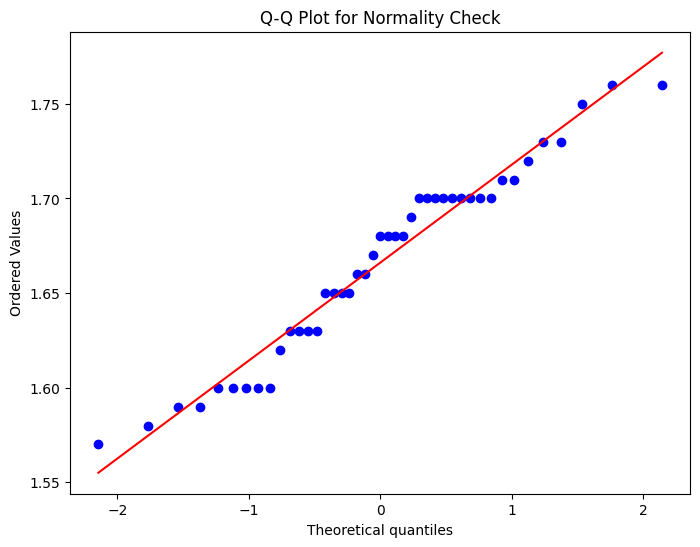

In [49]:
# Creating a Q-Q plot
plt.figure(figsize=(8, 6))
stats.probplot(women_height, dist="norm", plot=plt)
plt.title('Q-Q Plot for Normality Check')
plt.show()

- Όχι ιδιαίτερα κοντά στην κανονική κατανομή, αλλά αρκετά μεγάλο δείγμα (n = 26 >> 15 ) για να έχει ενας στατιστικός έλεγχος t ικανοποιητική ακρίβεια 

#### Μέσο ύψος Ανδρών

In [50]:
men_mean_height = men_height.mean()
men_mean_height

1.7870930232558142

#### Μέσο ύψος Γυναικών

In [51]:
women_mean_height = women_height.mean()
women_mean_height

1.6660465116279073

#### Τυπική Απόκλιση ύψους για τους άνδρες

In [52]:
men_std_height = men_height.std(ddof=1) # ddof=1 for sample standard deviation
men_std_height

0.05978129314071357

#### Τυπική Απόκλιση ύψους για τις γυναίκες

In [53]:
women_std_height = women_height.std(ddof=1) # ddof=1 for sample standard deviation
women_std_height

0.051136583441924954

In [54]:
delta_mean_height = abs(men_mean_height - women_mean_height)
delta_mean_height

0.12104651162790692

In [55]:
men_std_height_squared = men_std_height ** 2
women_std_height_squared = women_std_height ** 2
delta_sem_height = np.sqrt( (men_std_height_squared / count_of_men) + (women_std_height_squared / count_of_women) )
delta_sem_height

0.010117739051256642

In [56]:
confidence_level = 0.95
degrees_of_freedom = min(count_of_men - 1, count_of_women - 1)
t_score_95 = stats.t.ppf( (1 + confidence_level) /2, degrees_of_freedom) # t-score for 95% confidence interval
t_score_95

2.018081697095881

In [57]:
margin_of_error_95 = delta_sem_height * t_score_95
margin_of_error_95

0.020418423995333272

In [58]:
confidence_interval_95 = (delta_mean_height - abs(margin_of_error_95), delta_mean_height + abs(margin_of_error_95))
confidence_interval_95

(0.10062808763257364, 0.1414649356232402)

#### b. Οι άνδρες φοιτητές πληροφορικής -που έχουν πάρει ή θα έπαιρναν το μάθημα «Στατιστική στην Πληροφορική»-, επιτυγχάνουν μεγαλύτερο μέσο βαθμό στο μάθημα των Πιθανοτήτων από τον αντίστοιχο πληθυσμό γυναικών; Απαντήστε σε επίπεδο σημαντικότητας 5%

In [59]:
df.head()

,music,os,gender,height,weight,shoe,month,color,pet,number,prob,math
0,rock,MacOS,F,1.71,68.0,39.0,oct,purple,dog,88.0,3.0,5.0
1,rock,Windows,F,1.68,52.0,39.0,aug,brown,cat,73.0,7.0,5.0
2,rock,MacOS,M,1.80,84.0,43.0,may,black,dog,7.0,8.0,10.0
3,metal,Windows,M,1.74,85.0,44.0,nov,black,dog,100.0,3.5,6.0
4,hiphop,Windows,M,1.77,63.0,42.0,jan,black,dog,42.0,9.5,10.0


#### Χωρίζουμε τα δεδομένα μας σε δύο ομάδες, σε άνδρες και σε γυναίκες και κρατάμε μόνο την στήλη που περιέχει τον βαθμό του καθενός στις Πιθανότητες
- Επιπλέον, όσες γραμμές είναι άδειες (Nan τιμές), τις αφαιρούμε.

In [60]:
men_prob = df.groupby('gender').get_group('M')['prob']
men_prob = men_prob.dropna()
count_of_men = men_prob.count()

In [61]:
women_prob = df.groupby('gender').get_group('F')['prob']
women_prob = women_prob.dropna()
count_of_women = women_prob.count()

#### Υπολογίζουμε τον μέσο βαθμό στις Πιθανότητες για τους άνδρες.

In [62]:
men_mean_prob = men_prob.mean()
men_mean_prob

6.104938271604938

#### Υπολογίζουμε τον μέσο βαθμό στις Πιθανότητες για τις γυναίκες.

In [63]:
women_mean_prob = women_prob.mean()
women_mean_prob

5.966666666666667

#### Υπολογίζουμε την τυπική απόκλιση των βαθμών των ανδρών στις Πιθανότητες

In [64]:
men_std_prob = men_prob.std(ddof=1) # ddof=1 for sample standard deviation
men_std_prob

2.838040751758504

#### Υπολογίζουμε την τυπική απόκλιση των βαθμών των γυναικών στις Πιθανότητες

In [65]:
women_std_prob = women_prob.std(ddof=1) # ddof=1 for sample standard deviation
women_std_prob

2.466790925730101

#### Εκτέλεση του t-test

In [66]:
t_stat, p_value = stats.ttest_ind(men_prob, women_prob, equal_var=False)

#### t-statistic (σε απόλυτη τιμή)

In [67]:
abs(t_stat)

0.2514972094471861

#### Τιμή του p-value

In [68]:
p_value

0.8023000854883574

- Εφόσον  το p value είναι πολύ μεγαλύτερο από το επίπεδο σημαντικότητας 0.05, δεν απορρίπτουμε την μηδενική υπόθεση.
-  Επομένως, δεν μπορούμε να συμπεράνουμε από τα δεδομένα μας, ότι ο μέσος βαθμός των γυναικών είναι μεγαλύτερος από αυτόν των γυναικών.

#### c. Ο μέσος βαθμός στα Μαθηματικά 1 διαφέρει από το μέσο βαθμό στις Πιθανότητες -μεταξύ των φοιτητών που έχουν πάρει ή θα έπαιρναν το μάθημα «Στατιστική στην Πληροφορική»-;

In [69]:
# keep only rows that have values for both math and prob
df = df.dropna(subset=['math', 'prob'])
df.head()

,music,os,gender,height,weight,shoe,month,color,pet,number,prob,math
0,rock,MacOS,F,1.71,68.0,39.0,oct,purple,dog,88.0,3.0,5.0
1,rock,Windows,F,1.68,52.0,39.0,aug,brown,cat,73.0,7.0,5.0
2,rock,MacOS,M,1.80,84.0,43.0,may,black,dog,7.0,8.0,10.0
3,metal,Windows,M,1.74,85.0,44.0,nov,black,dog,100.0,3.5,6.0
4,hiphop,Windows,M,1.77,63.0,42.0,jan,black,dog,42.0,9.5,10.0


In [70]:
prob = df['prob']
prob.head()
# prob.count() # 107

0    3.0
1    7.0
2    8.0
3    3.5
4    9.5
Name: prob, dtype: float64

In [71]:
math = df['math']
math.head()
# math.count() # 107

0     5.0
1     5.0
2    10.0
3     6.0
4    10.0
Name: math, dtype: float64

#### Υπολογίζουμε τον μέσο βαθμό όλων των φοιτητών στα Μαθηματικά Ι

In [72]:
data = pd.DataFrame({'difference':[x-y for x,y in zip(prob, math)]})
data.head()

,difference
0,-2.0
1,2.0
2,-2.0
3,-2.5
4,-0.5


In [73]:
delta_mean = data['difference'].mean()
delta_mean

-0.205607476635514

#### Υπολογίζουμε την τυπική απόκλιση των βαθμών όλων των φοιτητών στα Μαθηματικά Ι

In [74]:
delta_std = data['difference'].std(ddof=1) # ddof=1 for sample standard deviation
delta_std

2.228623053007485

In [76]:
t_stat, p_value = stats.ttest_1samp(data['difference'], 0)

#### t-statistic (σε απόλυτη τιμή)

In [90]:
abs(t_stat)

0.9543203248437889

#### τιμή του p-value

In [91]:
p_value

0.34209277861965337

- Αφού το p-value είναι πολύ μεγαλύτερο από 0.05, παρατηρούμε ότι δεν υπάρχει στατιστικά σημαντική διαφορά στους μέσους βαθμούς μεταξύ των δύο μαθημάτων σε επίπεδο σημαντικότητας 5%. Άρα δεν απορρίπτουμε τη μηδενική υπόθεση ότι δεν υπάρχει διαφορά στην μέση επίδοση των φοιτητών στα δύο μαθήματα.

- Επομένως, μπορούμε να συμπεράνουμε ότι οι μέσοι βαθμοί στα Μαθηματικά 1 και στις Πιθανότητες δεν διαφέρουν σημαντικά μεταξύ των φοιτητών που έχουν πάρει ή θα έπαιρναν το μάθημα "Στατιστική στην Πληροφορική".